## Ch3. 機器學習與深度學習基礎

### 一、回歸 (Regression)

#### 1. 使用 sklearn 做回歸
##### 說明：使用 sklearn 實作線性回歸

In [5]:
# 引入程式碼所需套件
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 引入 sklean 相關套件
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

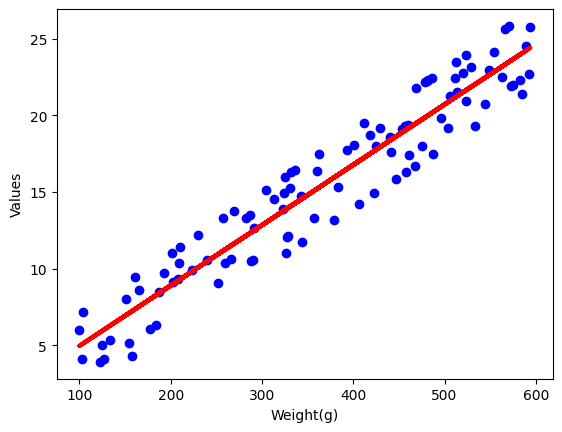

In [6]:
# 自行產生樣本點, 假設蘋果的重量和價值呈線性關係
weight = [i for i in range(100, 600)]
values = [weight[i]/1000*40+random.randint(-2, 3) for i in range(500)]

# 將重量與價值用 x 與 y 表示
x, y = weight, values 

# 切割訓練集與測試集, test_size設0.2, 表示將有20%的資料成為測試集, 80%的資料為訓練集。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2) 

# 對資料進行標準化
std_x = StandardScaler()
x_train = std_x.fit_transform(np.array(x_train)[:,np.newaxis])  
x_test = std_x.fit_transform(np.array(x_test)[:,np.newaxis])    

std_y = StandardScaler()
y_train = std_y.fit_transform(np.array(y_train)[:,np.newaxis])
y_test = std_y.fit_transform(np.array(y_test)[:,np.newaxis])   

# 實例化 sklearn 的 LinearRegression
lr = LinearRegression()

# 將訓練集餵給模型，找尋模型參數
lr.fit(x_train, y_train)

# 將測試集的自變數(蘋果的重量)餵給模型，預測可能的結果.
y_pred = lr.predict(x_test)

# 對預測的結果進行反標準化
y_pred = std_y.inverse_transform(y_pred)
y_real = std_y.inverse_transform(y_test)
x_test = std_x.inverse_transform(x_test)

# 使用 matplotlib 畫圖
plt.scatter(x_test, y_real, color="blue")
plt.plot(x_test, y_pred, color="red", linewidth=3)

# 設定x軸與y軸的名稱
plt.xlabel("Weight(g)")
plt.ylabel("Values")
plt.show()

In [7]:
# 查看我們的預測資料與實際資料的差距
for i in range(10):
    print(y_pred[i],y_real[i])

print("-"*10)

# 計算誤差值
error = mean_squared_error(y_real, y_pred)
print("MSE error: ", error)

[19.96878757] [22.24]
[21.18930314] [23.48]
[16.81906996] [18.04]
[20.87433138] [19.16]
[20.16564492] [22.44]
[24.06342046] [21.4]
[19.45695846] [16.72]
[7.09431683] [5.16]
[13.35438058] [14.52]
[14.06306705] [15.24]
----------
MSE error:  2.968004689349889


#### 2. 使用梯度下降做回歸
##### 說明：使用梯度下降實作線性回歸

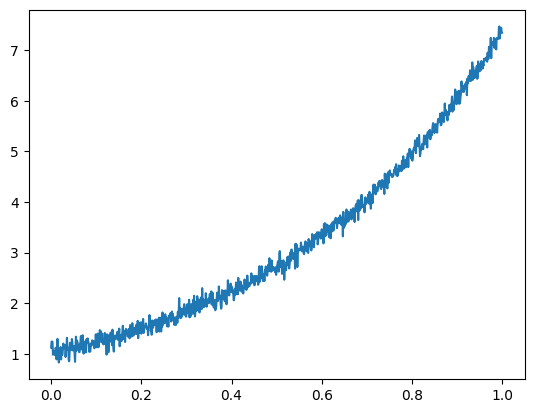

In [8]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 讀取提供的資料 data.mat
data = loadmat('./data.mat')

# 將 data 中的 x 與 y 分別讀出
x, y = data['x'],data['y']

# 使用 matplotlib 做圖
plt.plot(x,y); plt.show()

##### 簡單線性回歸

a, b = 5.98091716963753 0.20702719954941007
L2 Loss =  0.20580596682517396


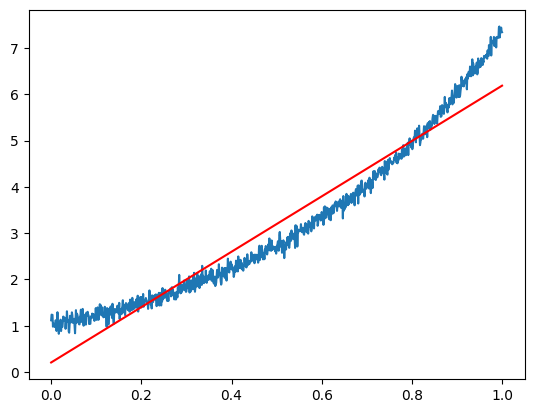

In [9]:
# 簡單線性回歸,即要預測一條直線,此直線的表達式：y = ax + b
a = 1; b = 0            # 初始化 a 與 b
n = len(data['x'])      # n 為樣本點數
learning_rate = 0.3     # 設定學習率
epochs = 1000           # 設定 Epoch 數 

for i in range(epochs):

    # 根據目前的模型參數產生預測結果
    y_predicted = a*x + b

    # 計算梯度值
    d_a = (-2/n) * sum(x * (y - y_predicted))
    d_b = (-2/n) * sum(y - y_predicted)
    
    # 更新參數
    a = a-learning_rate*d_a
    b = b-learning_rate*d_b

# 印出經由梯度下降法求得的參數 a 以及 b
print('a, b =',a[0],b[0])
y_predicted = a*x + b

# 計算預測結果與標準答案的均方誤差(Mean Square Error, MSE)
print('L2 Loss = ', np.mean(pow(y_predicted-y,2)))

# 繪圖 (樣本點以及預測出的直線)
plt.plot(x, y)
plt.plot(x, y_predicted,'r-')
plt.show()

##### 非線性回歸

a, b, c = 5.746239695873643 0.2380015284105624 1.1620685451366861
L2 Loss =  0.015792146372415744


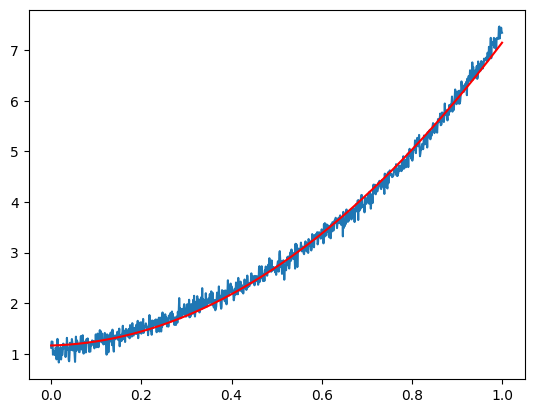

In [10]:
# 非線性回歸,此處希望預測一條曲線,此曲線的表達式：y = ax^2 + bx + c
a = 1; b = 0; c = 0     # 初始化模型參數 a, b, c
n = len(data['x'])      # n 為樣本點數
learning_rate = 0.3     # 設定學習率
epochs = 2000           # 設定 Epoch 數

for i in range(epochs):

    # 根據目前的模型參數產生預測結果
    y_predicted = a*x*x + b*x + c
    
    # 計算梯度
    d_b = (-2/n) * sum(x * (y - y_predicted))   
    d_c = (-2/n) * sum(y - y_predicted)         
    d_a = (-2/n) * sum(x *x *(y - y_predicted))

    # 更新模型參數
    a = a-learning_rate*d_a
    b = b-learning_rate*d_b
    c = c-learning_rate*d_c

# 印出經由梯度下降法求得的參數 a, b, c
print('a, b, c =',a[0], b[0], c[0])
y_predicted = a*x*x + b*x + c

# 計算預測結果與標準答案的均方誤差(Mean Square Error, MSE)
print('L2 Loss = ',np.mean(pow(y_predicted-y,2)))

# 繪圖 (樣本點以及預測出的曲線)
plt.plot(x,y)
plt.plot(x,y_predicted,'r-')
plt.show()

#### 3. 使用矩陣法做回歸

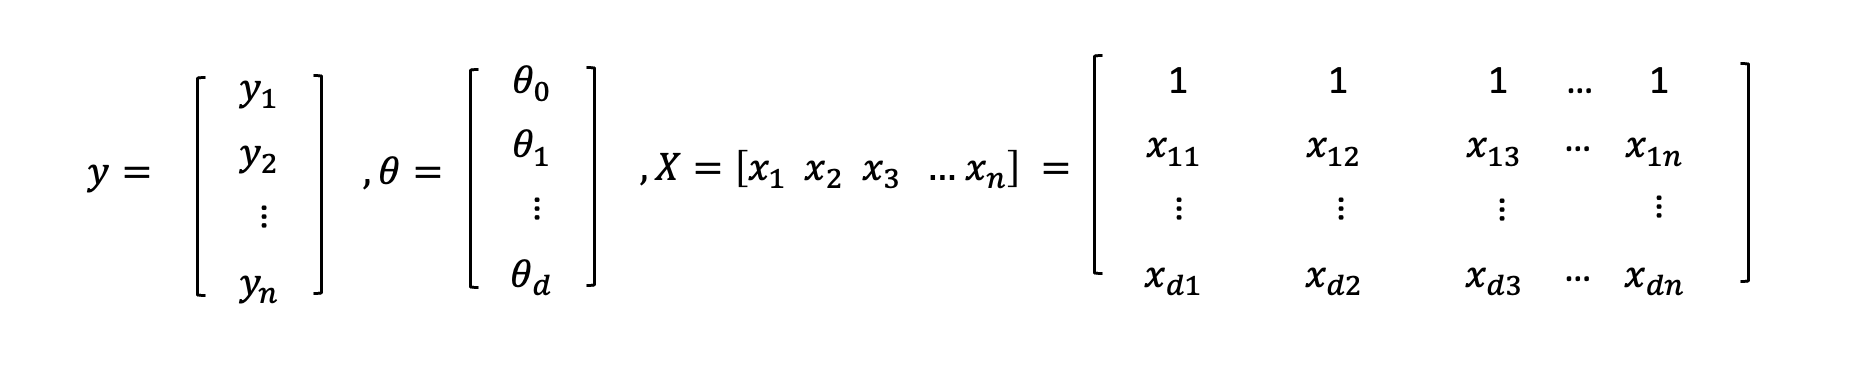

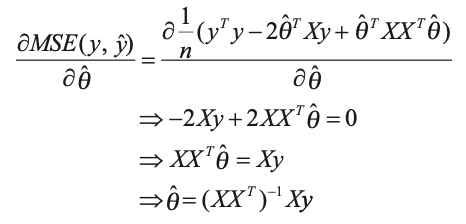

##### 簡單線性回歸

a, b =  5.98091716963754 0.20702719954940532
L2 Loss =  0.20580596682517402


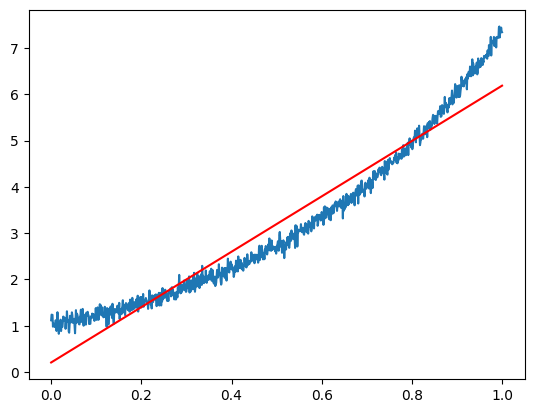

In [11]:
y_predict = np.array(y)
# 將X補上1的值, 如以上數學式所示
X = np.concatenate((np.ones((1001,1)),np.array(x)),axis=1).T

# 計算模型參數
b, a = (np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y_predict)).tolist()

# 產生預測結果
y_predicted= b[0] + a[0]*x 

# 印出模型參數並計算 L2 Loss
print('a, b = ', a[0],b[0])
print('L2 Loss = ',np.mean(pow(y_predicted-y,2)))

# 繪圖
plt.plot(x,y)
plt.plot(x,y_predicted,'r-')
plt.show()

##### 非線性回歸

Psuedo Inverse

$ y_{pred}= c+bx+ax^2$

$ \theta = (A^T A)^{-1} A^T y , $

where $\theta=[c,b,a] $

$ A = 
\begin{bmatrix}
    1      & x_1 & x_1^2 \\
    1       & x_2 & x_2^2 \\
    \vdots & \vdots & \vdots \\
    1       & x_{1001} & x_{1001}^2
\end{bmatrix}
$

a, b, c =  5.837350079181457 0.14356709045604127 1.1789459877331252
Loss =  0.015744919931207565


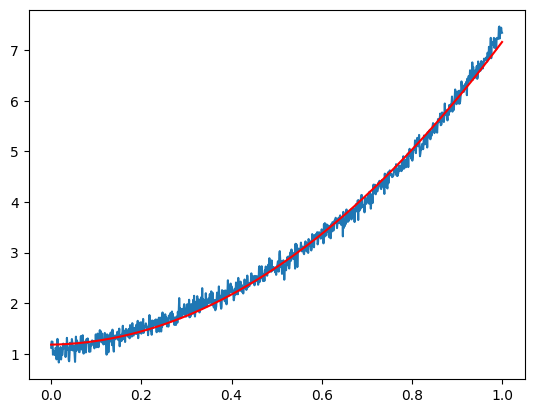

In [12]:
y_predict = np.array(y)
# 將X補上1的值, 如以上數學式所示
X = np.concatenate((np.ones((1001,1)),np.array(x),np.array(pow(x,2))),axis=1).T

# 計算模型參數
c, b, a = (np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y_predict)).tolist()

# 產生預測結果
y_predicted= c[0] + b[0]*x + a[0]*x*x

# 印出模型參數並計算 L2 Loss
print('a, b, c = ',a[0], b[0], c[0])
print('Loss = ',np.mean(pow(y_predicted-y,2)))

# 繪圖
plt.plot(x,y)
plt.plot(x,y_predicted,'r-')
plt.show()

### 二、分類 (Classification)

#### 1. 使用 sklearn 做 KNN 分類

##### 範例說明: 以四個中心點為中心，生成多個周遭樣本點(使用常態分佈生成)，接者隨機指定一點，並使用KNN進行分類。

The point is clse to [1, 5]


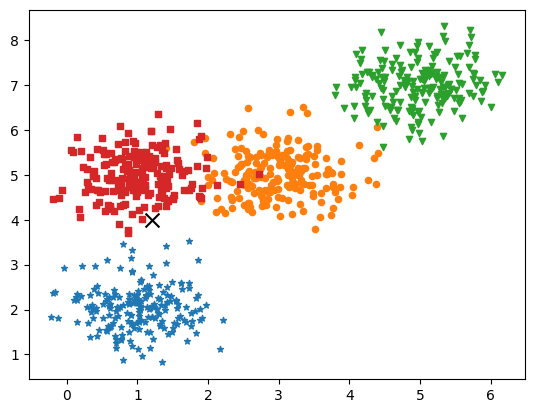

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 產生樣本點
X = []
center = [[1,2],[3,5],[5,7], [1,5]] # 設定中心點
for idx in range(len(center)):
  for sample_num in range(200):
    vx = np.random.normal(0, 0.5, 1)
    vy = np.random.normal(0, 0.5, 1)
    X.append([float(center[idx][0])+float(vx), float(center[idx][1])+float(vy), idx])    
X = np.array(X)

features=list(zip(X[:,0],X[:,1]))
label = X[:,2]

# 實例化KNN分類器
model = KNeighborsClassifier(n_neighbors=5)

# 將資料傳入模型中
model.fit(features, label)

# 產生預測結果
predicted= model.predict([[1.2, 4]])
print("The point is clse to", center[int(predicted[0])])

# 繪圖


#plt.scatter(X[:, 0], X[:, 1], c = label, s=20)

markers = ["*", "o", "v", "s"]
for i in range(4):
    plt.scatter(X[label==i][:,0],X[label==i][:,1], marker=markers[i], s=20)

plt.scatter(1.2, 4, c="black", marker="x", s=100)
plt.show()

### 三、降維 (Reduce Dimension)

#### 1. 使用 sklearn 做 PCA 降維

In [14]:
# 引入程式碼所需套件
from sklearn.decomposition import PCA
# 實例化 sklearn 中的 PCA
pca = PCA(n_components=2) #n_components表示的是欲降的維數
data = pca.fit_transform([[2, 4, 4, 4, 9],
                          [6, 3, 0, 8, 7],
                          [5, 4, 9, 1, 8]])
print(data)

[[-0.30638074  2.58532563]
 [ 5.91855094 -1.18962148]
 [-5.6121702  -1.39570416]]


#### 2. 計算特徵值做 PCA 降維

範例說明：此處範例，我們將對 Mnist手寫辨識資料集中的數字圖進行降維，也可以將降為想像成是編碼(Encode)的過程，接者會在對編碼後的特徵做升維，進行解碼(Decode)。也透過此例來演釋如何使用特徵值來做降維。

In [15]:
import keras
from keras.datasets import mnist
import numpy as np

# 準備 Mnist 資料集 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 將資料轉換成浮點數
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


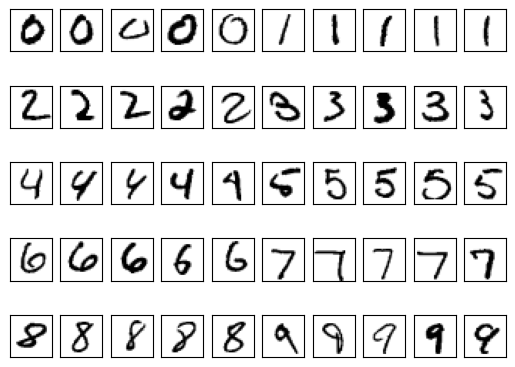

In [16]:
import matplotlib.pyplot as plt

dict = {} # 取出每個數字各100張
for n in range(x_test.shape[0]):
    if y_test[n] in dict:
        if dict[y_test[n]].shape[0] > 99:
            continue
        dict[y_test[n]] = np.concatenate((dict[y_test[n]],x_test[n][np.newaxis,:]),0)
    else:
        dict[y_test[n]] = x_test[n][np.newaxis,:]

# 將 dict 中的每個數字取出並拼接成 numpy (N=1000, H=28, W=28)
all_image = dict[0]
for n in range(1,10):
    all_image = np.concatenate((all_image,dict[n]),0)

# 顯示 mnist 影像
def showimg(x_test):
    amount= 50
    lines = 5
    columns = 10
    number = np.zeros(amount)

    for i in range(amount):
        number[i] = y_test[i]

    fig = plt.figure()

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x_test[i,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])

    plt.show()

# 印出每隔 20 張的手寫影像
showimg(all_image[::20])

下降至 784 維(編碼)，再進行升維(解碼)的結果


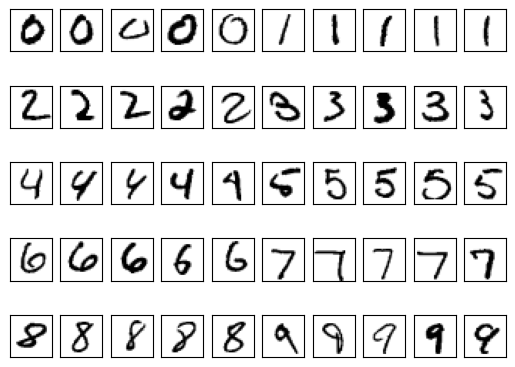

--------------------------------------------------
下降至 500 維(編碼)，再進行升維(解碼)的結果


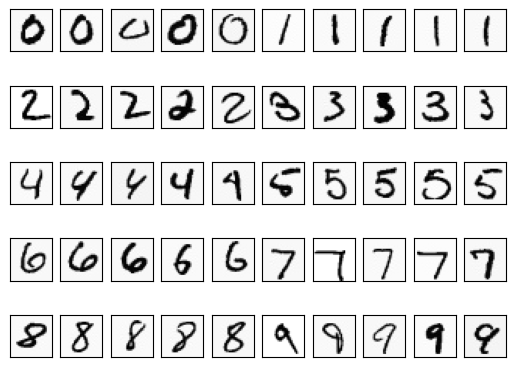

--------------------------------------------------
下降至 300 維(編碼)，再進行升維(解碼)的結果


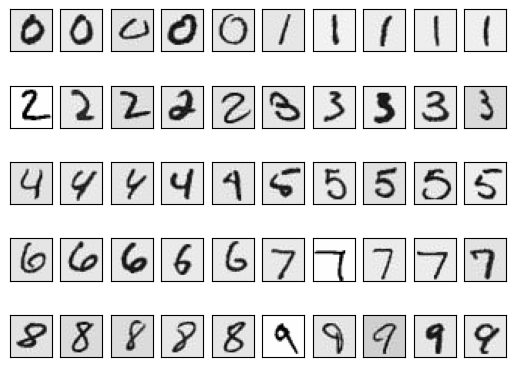

--------------------------------------------------
下降至 100 維(編碼)，再進行升維(解碼)的結果


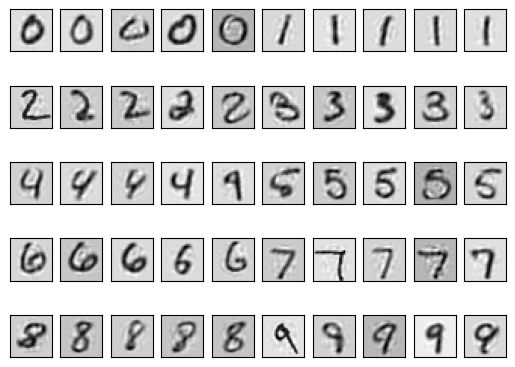

--------------------------------------------------
下降至 50 維(編碼)，再進行升維(解碼)的結果


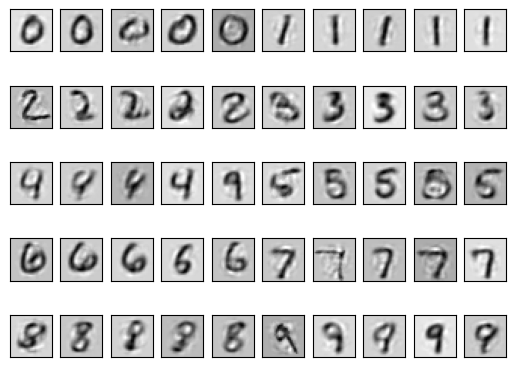

--------------------------------------------------
下降至 30 維(編碼)，再進行升維(解碼)的結果


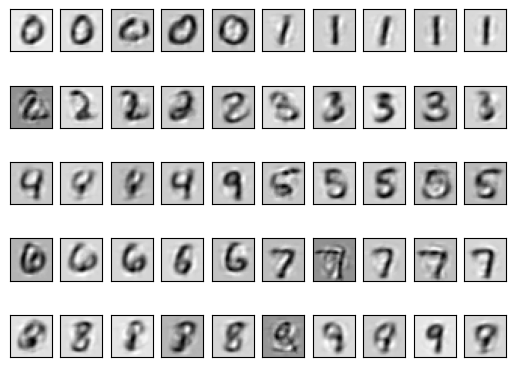

--------------------------------------------------


In [17]:
# 開始進行不同維度的降維
dimensions = [784, 500, 300, 100, 50, 30]

for d in dimensions:

    # 計算X的共變異矩陣
    flat_x = all_image.reshape(1000,784).T
    flat_x_mean = np.mean(flat_x, axis=1,keepdims=True)
    flat_x_std = np.std(flat_x, axis=1,keepdims=True, ddof=1)
    flat_x_std[flat_x_std == 0] = 1e-10
    flat_x_normalized = ((flat_x - flat_x_mean)/flat_x_std).T
    x_covariance = np.dot(flat_x_normalized.T,flat_x_normalized) 
    
    # 計算共變異矩陣的特徵值以及特徵向量
    eig_value, eig_vector = np.linalg.eig(x_covariance)

    # 對特徵值排序
    eigen_index = np.argsort(-eig_value)
    eigen_index = eigen_index[:d]
    eig_vector = eig_vector[:,eigen_index]

    # 與特徵向量相乘, 進行編碼(Encode)
    xvector = np.dot(flat_x_normalized , eig_vector) 
    
    # 與特徵向量的轉置相乘, 進行解碼(Decode)
    img_pca = np.dot(xvector , eig_vector.T)
    img_pca = img_pca*flat_x_std.T + flat_x_mean.T
    img_pca = img_pca.reshape(1000,28,28)

    print(f'下降至 {d} 維(編碼)，再進行升維(解碼)的結果') 
    showimg(np.float32(img_pca).reshape(1000,28,28)[::20])
    print('-'*50)

### 四、分群 (Clustering)

#### 使用 sklearn 做 K-means 分群

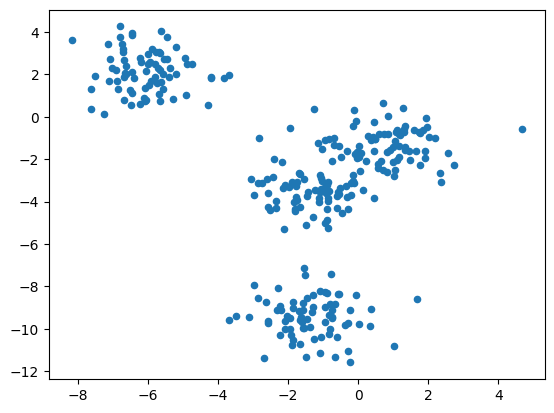

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.90, random_state=2)
plt.scatter(X[:, 0], X[:, 1], s=20)

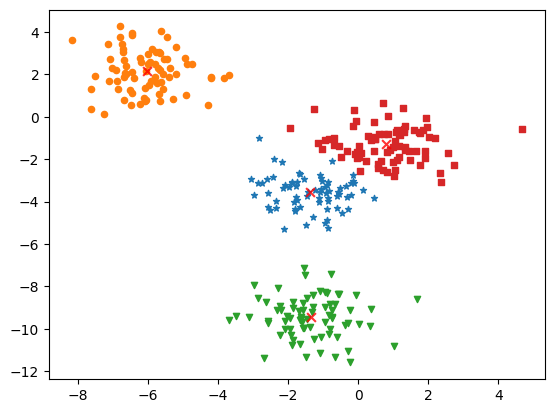

In [19]:
# 實例化 sklearn 中的 kmean (n_cluster 表示的是要分的類別數量, n_init 表示的是 k-mean 演算法要跑的次數)
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(X)

# 產生預測的結果
y_kmeans = kmeans.predict(X)

# 將不同的結果用不同的顏色與形狀標註
markers = ["*", "o", "v", "s"]
for i in range(4):
    plt.scatter(X[y_kmeans==i][:,0],X[y_kmeans==i][:,1], marker=markers[i], s=20)

# 將每一群的中心點標記出來
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker="x", s=40, alpha=0.8)

#### 自行生成資料集，並做K-means分群

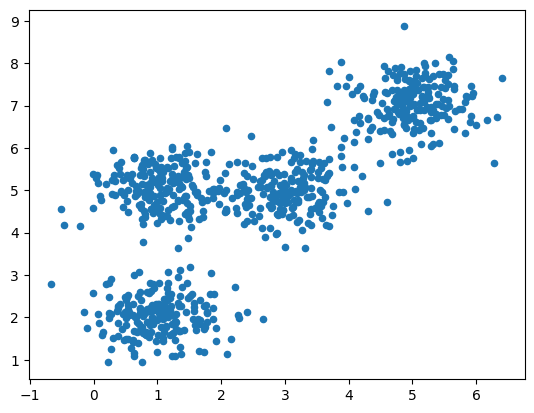

In [20]:
import random
import numpy as np

# 生成資料
X = []
center = [[1,2],[3,5],[5,7], [1,5]]
for i in range(len(center)):
  for sample_num in range(200):
    vx = np.random.normal(0, 0.5, 1)
    vy = np.random.normal(0, 0.5, 1)
    X.append([float(center[i][0])+float(vx), float(center[i][1])+float(vy)])    

X = np.array(X)

# 繪製資料
plt.scatter(X[:, 0], X[:, 1], s=20)

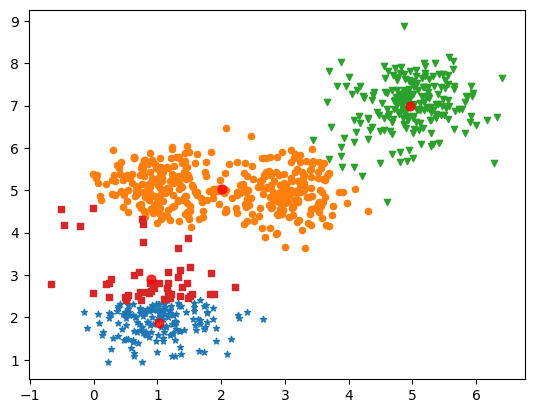

In [21]:
# 實例化sklearn中的 K-maens，並分出4群
kmeans = KMeans(n_clusters=4,n_init="auto")
kmeans.fit(X)

# 產生預測結果
y_kmeans = kmeans.predict(X)

# 將不同的預測結果用不同的形狀呈現於圖中
markers = ["*", "o", "v", "s"]
for i in range(4):
    plt.scatter(X[y_kmeans==i][:,0],X[y_kmeans==i][:,1], marker=markers[i], s=20)

# 將中心點標出
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=40, alpha=0.8)